In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

import io
from urllib.request import urlopen
import zipfile
import os
import duckdb

In [111]:
hist = []

In [113]:
directory = os.fsencode("data/before_removing_stock_keyword/filter/stocks_to_keywords_specific")
    
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    num_lines = sum(1 for _ in open("data/before_removing_stock_keyword/filter/stocks_to_keywords_specific" + "/" + filename))
    stock = filename.split('_')[0]
    hist.append((stock, num_lines))
    print(filename, num_lines)

KO_coca-cola.csv 788
JNJ_johnson-and-johnson.csv 9350
ADM_archer-daniels.csv 239
VZ_verizon.csv 861
NVDA_nvidia.csv 3489
PFE_pfizer.csv 4180
NEM_newmont-corporation.csv 159
DE_deere.csv 256
CVX_chevron.csv 2157
T_att.csv 3396
BP_bp.csv 1133
XOM_exxon-mobil.csv 1626
COP_conocophillips.csv 205
DOW_dow-jones.csv 360
MSFT_microsoft.csv 6229
TMUS_t-mobile.csv 982
ABBV_abbvie.csv 127
PEP_pepsico.csv 470
MA_mastercard.csv 1445
AAPL_apple.csv 9825
JPM_jpmorgan-chase.csv 404
FCX_freeport-mcmoran.csv 238
PG_procter-and-gamble.csv 83
V_visa.csv 3435
CTVA_corteva.csv 57


In [115]:
hist

[('KO', 788),
 ('JNJ', 9350),
 ('ADM', 239),
 ('VZ', 861),
 ('NVDA', 3489),
 ('PFE', 4180),
 ('NEM', 159),
 ('DE', 256),
 ('CVX', 2157),
 ('T', 3396),
 ('BP', 1133),
 ('XOM', 1626),
 ('COP', 205),
 ('DOW', 360),
 ('MSFT', 6229),
 ('TMUS', 982),
 ('ABBV', 127),
 ('PEP', 470),
 ('MA', 1445),
 ('AAPL', 9825),
 ('JPM', 404),
 ('FCX', 238),
 ('PG', 83),
 ('V', 3435),
 ('CTVA', 57)]

In [119]:
stocks = [hist[i][0] for i in range(len(hist))]
num_articles = [hist[i][1] for i in range(len(hist))]

In [125]:
company_news = pd.DataFrame(list(zip(stocks, num_articles)), columns = ["Stock", "Num Articles"])

In [131]:
company_news.sort_values(by=["Num Articles"], ascending=False, inplace=True)

Text(0.5, 1.0, 'Number of filtered articles mentioning each company from Jan 2019 to Oct 2024')

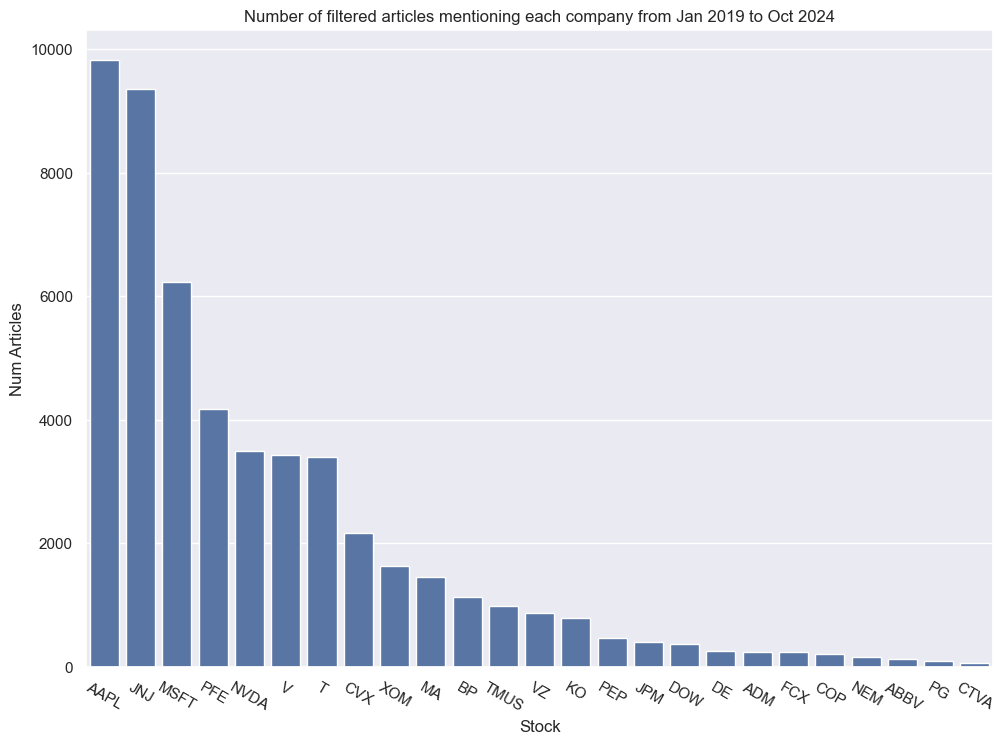

In [141]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="Stock", y="Num Articles", data=company_news)
plt.xticks(rotation=-30)
plt.title("Number of filtered articles mentioning each company from Jan 2019 to Oct 2024")